In [2]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
data1=pd.read_csv('Galle.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data1 = data1.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data2 = pd.read_csv('Matara.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data2 = data2.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data3 = pd.read_csv('Hambanthota.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data3 = data3.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data4=pd.read_csv('Katubedda.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data4 = data4.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data5 = pd.read_csv('Fort.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data5 = data5.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data6 = pd.read_csv('BattaramullaCEA.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data6 = data6.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data_list=[data1,data2,data3,data4,data5,data6]
#data = pd.concat([data1, data2, data3])
data = pd.concat(data_list)
#data.reset_index(drop=True, inplace=True)
data = data.sort_index()
data = data.groupby('timestamp_index').mean()
Length=len(data)
data
print(len(data))


8702


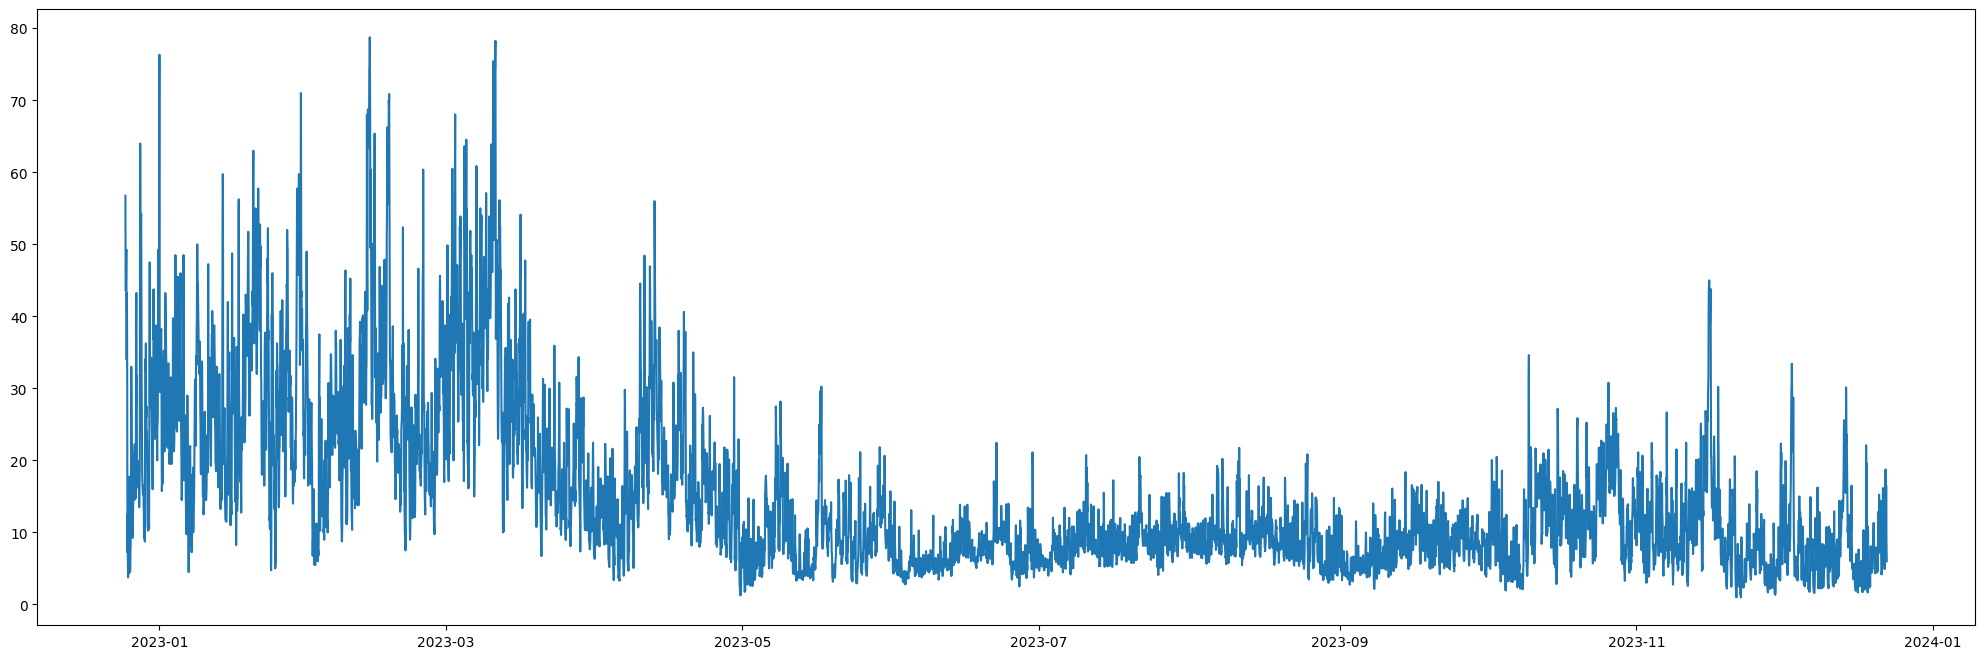

In [4]:
plt.figure(figsize=(25, 8))
plt.plot(data.index,data['PM2.5 (ug/m3)'])

plt.show()

In [5]:
# Splitting data into train and test sets
#train_data = list(data1['PM2.5 (ug/m3)'].iloc[:int(Length1*0.7)])
#test_data = list(data1['PM2.5 (ug/m3)'].iloc[int(Length1*0.7):])

to_row = int(len(data)*0.8)

train_data = list(data[0:to_row]['PM2.5 (ug/m3)'])
test_data = list(data[to_row:]['PM2.5 (ug/m3)'])

len(test_data)

1741

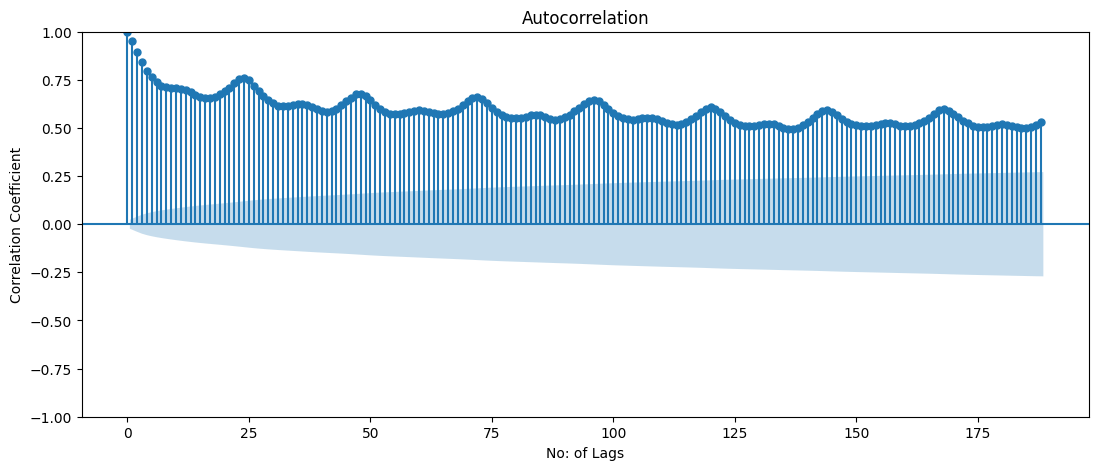

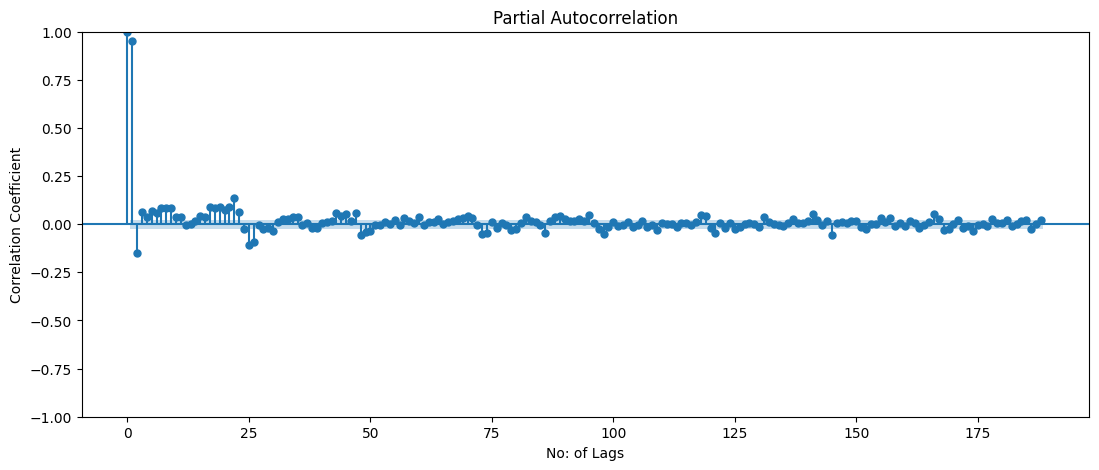

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#lag refers to the time difference between two points in the series. Here we have 4503 train data.
#As here we have 188 weeks of data shall we use lags= 188

fig, ax = plt.subplots(figsize=(13, 5))  # Width=10, Height=6
plt.xlabel('No: of Lags')
plt.ylabel('Correlation Coefficient')
plot_acf(train_data, lags=188, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(13, 5))  # Width=10, Height=6
plt.xlabel('No: of Lags')
plt.ylabel('Correlation Coefficient')
plot_pacf(train_data, lags=188, ax=ax)
plt.show()

In [17]:
model_predictions = []
n_test_obser =len(test_data)
print(len(test_data))
print(len(train_data))
print(len(model_predictions))

1741
6961
0


In [18]:

'''
These autocorrelation and partial autocorrelation graphs help to determine the p,q factors in the 
ARMA model.As this Autocorrelation has a decaying function and partial autocorrelation function 
gives 2 spikes in the start. Then p value of the model is equal to 2. The autocorrelation function 
gives 5 spikes in the beginning so the q value of the model equals 5. 
'''

# Fit the ARMA model
# The '0' indicates no differencing because this is ARMA model
#model = sm.tsa.ARIMA(train_data, order=(p, 0, q))  

#results = model.fit()

#model = ARIMA(train_data, order = (2,0,1))
#model_fit = model.fit()

for i in range(n_test_obser):
  model = ARIMA(train_data, order = (2,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output)
  
  model_predictions.append(yhat)
  actual_test_value = test_data[i]
  train_data.append(actual_test_value)
  print(i)
  '''if(i>1200):
    break
  #break'''

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:

print(model_fit.summary())
#len(model_predictions)
#print(test_data.index)
print(len(model_predictions))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8701
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -22937.397
Date:                Sun, 03 Mar 2024   AIC                          45882.795
Time:                        13:31:49   BIC                          45911.079
Sample:                             0   HQIC                         45892.435
                               - 8701                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0233      0.006    182.518      0.000       1.012       1.034
ar.L2         -0.2044      0.006    -34.683      0.000      -0.216      -0.193
ma.L1         -0.9681      0.002   -393.600      0.0

<Figure size 2500x900 with 0 Axes>

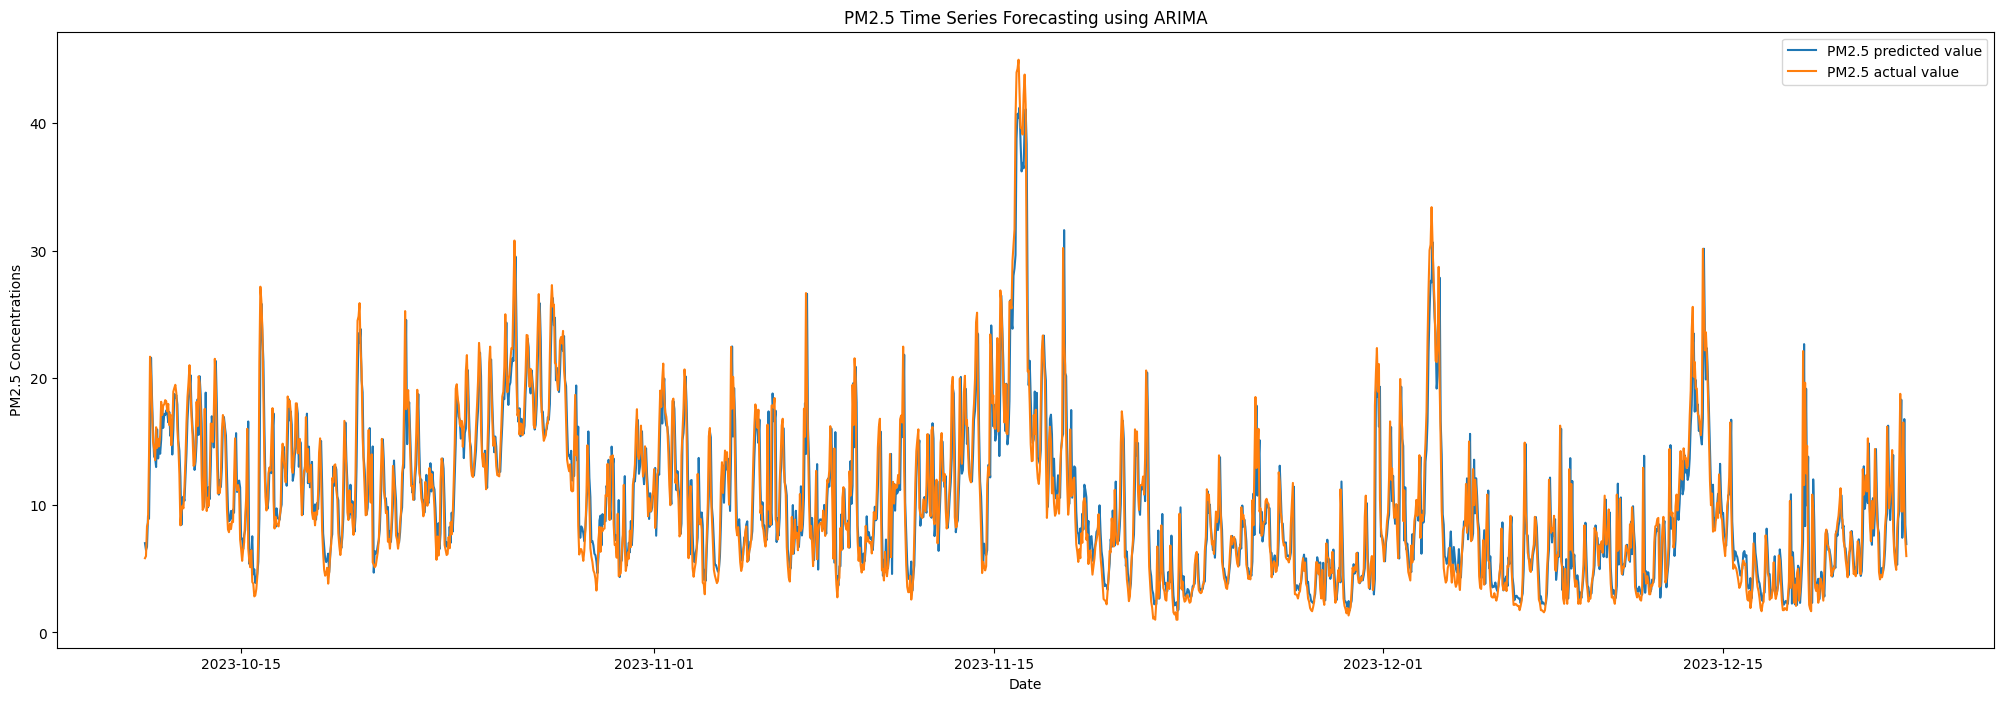

In [20]:

plt.figure(figsize=(25,9))

'''
data_range = data1[to_row:].index

plt.plot(data_range, model_predictions, color = 'blue',label = 'PM2.5 predicted value')
plt.plot(data_range, test_data, color = 'red', label = 'PM2.5 actual value')

plt.title("PM2.5 prediction")
plt.legend()
plt.show()
'''
# Create a new index for the forecast steps
#forecast_index = pd.date_range(start=test_data.index[0], periods=n_steps+1, freq='H')[1:]

# Access the predicted values
#predicted_values = forecast_values.predicted_mean.values

plt.figure(figsize=(25, 8))
data_range = data[to_row:].index

plt.plot(data_range, model_predictions,label = 'PM2.5 predicted value')
plt.plot(data_range, test_data, label = 'PM2.5 actual value')

#plt.plot(forecast_index, predicted_values, color='red', label='Predicted Values')
plt.title('PM2.5 Time Series Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentrations')
plt.legend()
plt.show()


In [21]:

y_true = test_data  # Replace with your actual values
y_pred = model_predictions
# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False) # Compute RMSE from MSE

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.8780347601315321
Mean Squared Error (MSE): 7.269407745455841
Root Mean Squared Error (RMSE): 2.69618392277972


In [25]:
model_fit.save("ARIMA model 2,1,1 cluster 2.pkl")

In [26]:
import statsmodels.api as sm
loaded_model = sm.load("ARIMA model 2,1,1 cluster 2.pkl")

In [27]:
loaded_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8701
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -22937.397
Date:                Sun, 03 Mar 2024   AIC                          45882.795
Time:                        13:39:30   BIC                          45911.079
Sample:                             0   HQIC                         45892.435
                               - 8701                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0233      0.006    182.518      0.000       1.012       1.034
ar.L2         -0.2044      0.006    -34.683      0.000      -0.216      -0.193
ma.L1         -0.9681      0.002   -393.600      0.000      -0.973      -0.963
sigma2        11.4156      0.072    158.772      0.000      11.275      11.556
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             44726.98
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""